In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [131]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [132]:
x = df.drop(['Survived'],axis=1)
y = df[['Survived']]

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [134]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [135]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

/tmp/ipykernel_8424/1258921994.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
/tmp/ipykernel_8424/1258921994.

In [136]:
x_train

,Age,Fare,Age_imputed
852,9.0,15.2458,9.00
105,28.0,7.8958,28.00
326,61.0,6.2375,61.00
18,31.0,18.0000,31.00
687,19.0,10.1708,19.00
...,...,...,...
821,27.0,8.6625,27.00
110,47.0,52.0000,47.00
266,16.0,39.6875,16.00
502,NaN,7.6292,0.83


/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


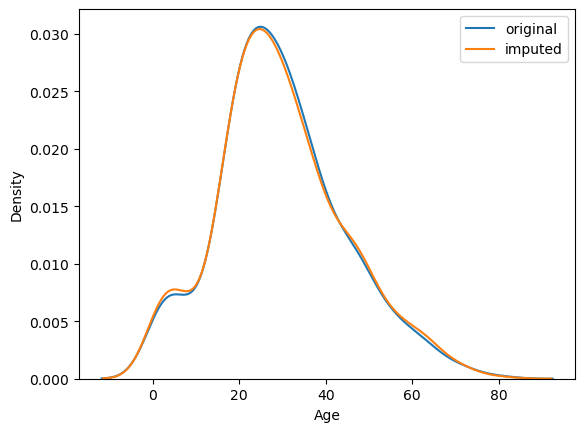

In [137]:
sns.kdeplot(x_train['Age'],label='original')
sns.kdeplot(x_train['Age_imputed'],label='imputed')
plt.legend()
# bot grps are overlapped

In [138]:
print("Original var : ",x_train['Age'].var())
print("Imputed var : ",x_train['Age_imputed'].var())

Original var :  212.72142952336435
Imputed var :  220.16425880719865


In [139]:
x_train.cov()

,Age,Fare,Age_imputed
Age,212.721430,61.551605,212.721430
Fare,61.551605,2895.320969,44.805380
Age_imputed,212.721430,44.805380,220.164259


<Axes: >

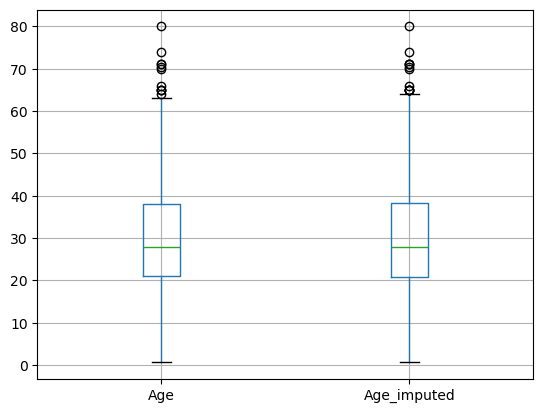

In [140]:
x_train[['Age','Age_imputed']].boxplot()
# ouliers are also same

In [141]:
## when ever new obs is come if it is already present but age is missing we have to assign same age

# smaple_value = x_train['Age'].dropna().smaple(1,random_state=int(observation['Fare']))

### categorical values

In [142]:
data = pd.read_csv('house_train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [143]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [144]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [145]:
x = data
y = data[['SalePrice']]

In [146]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
x_train

,FireplaceQu,GarageQual,SalePrice
1444,NaN,TA,179600
573,TA,TA,170000
1352,NaN,TA,134900
1097,NaN,TA,170000
382,NaN,TA,213500
...,...,...,...
1244,Gd,TA,230000
812,NaN,TA,55993
521,Gd,TA,150000
179,NaN,Fa,100000


In [147]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [148]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual_imputed'].dropna().sample(x_train['GarageQual_imputed'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual_imputed'].dropna().sample(x_test['GarageQual_imputed'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu_imputed'].dropna().sample(x_train['FireplaceQu_imputed'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu_imputed'].dropna().sample(x_test['FireplaceQu_imputed'].isnull().sum()).values

/tmp/ipykernel_8424/519450296.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual_imputed'].dropna().sample(x_train['GarageQual_imputed'].isnull().su

In [149]:
temp = pd.concat([
    x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
    x_train['GarageQual_imputed'].value_counts()/len(x_train)
    
],axis=1)

temp.columns = ['original','imputed']
temp

,original,imputed
TA,0.949564,0.950685
Fa,0.035887,0.033790
Gd,0.008729,0.010046
Po,0.002910,0.002740
Ex,0.002910,0.002740


In [150]:
temp = pd.concat([
    x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
    x_train['FireplaceQu_imputed'].value_counts()/len(x_train)
    
],axis=1)

temp.columns = ['original','imputed']
temp

,original,imputed
Gd,0.486063,0.486758
TA,0.412892,0.411872
Fa,0.043554,0.044749
Ex,0.029617,0.028311
Po,0.027875,0.028311


/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

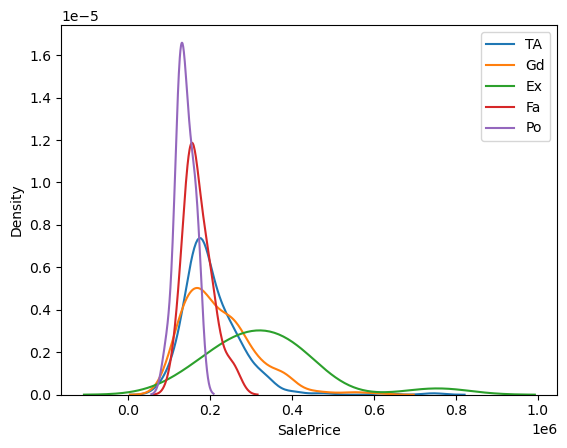

In [152]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu']==category]['SalePrice'],label=category)
plt.legend()

/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

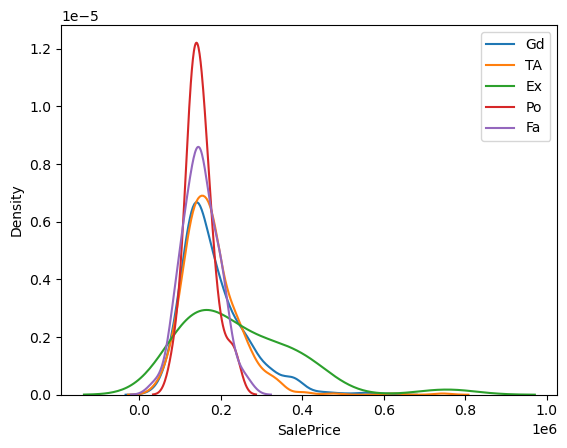

In [153]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'],label=category)
plt.legend()

    